In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [6]:
main_directory = '/home/a20114261/sdelrio/GeneInteractions/GeneInteractionsBN_Datasets/Balanced_Batches/'
with open(main_directory+'total_results.pickle', 'rb') as f:
    total_results = pickle.load(f)

In [37]:
df = pd.DataFrame(columns=["Número de nodos", "Media Geométrica", "Método de Selección de Atributos","Clasificador", "Origen"])
for key in total_results:
    for f_key in total_results[key]:
        if 'AGA' not in f_key:
            for c_key in total_results[key][f_key]:
                for t_key in total_results[key][f_key][c_key]:
                    df = df.append({
                        "Número de nodos":int(t_key.split('top')[1]), 
                        "Media Geométrica":total_results[key][f_key][c_key][t_key],
                        "Método de Selección de Atributos":f_key,
                        "Clasificador":c_key,
                        "Origen":key
                    }, ignore_index=True)

In [45]:
[x for x in os.listdir(main_directory) if 'pickle' not in x]

['censored_Jnk',
 'censored_Ikk2',
 'censored_LEF1',
 'censored_IRF4',
 'censored_MYC',
 'censored_Erk',
 'censored_CTNNB1']

/home/a20114261/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


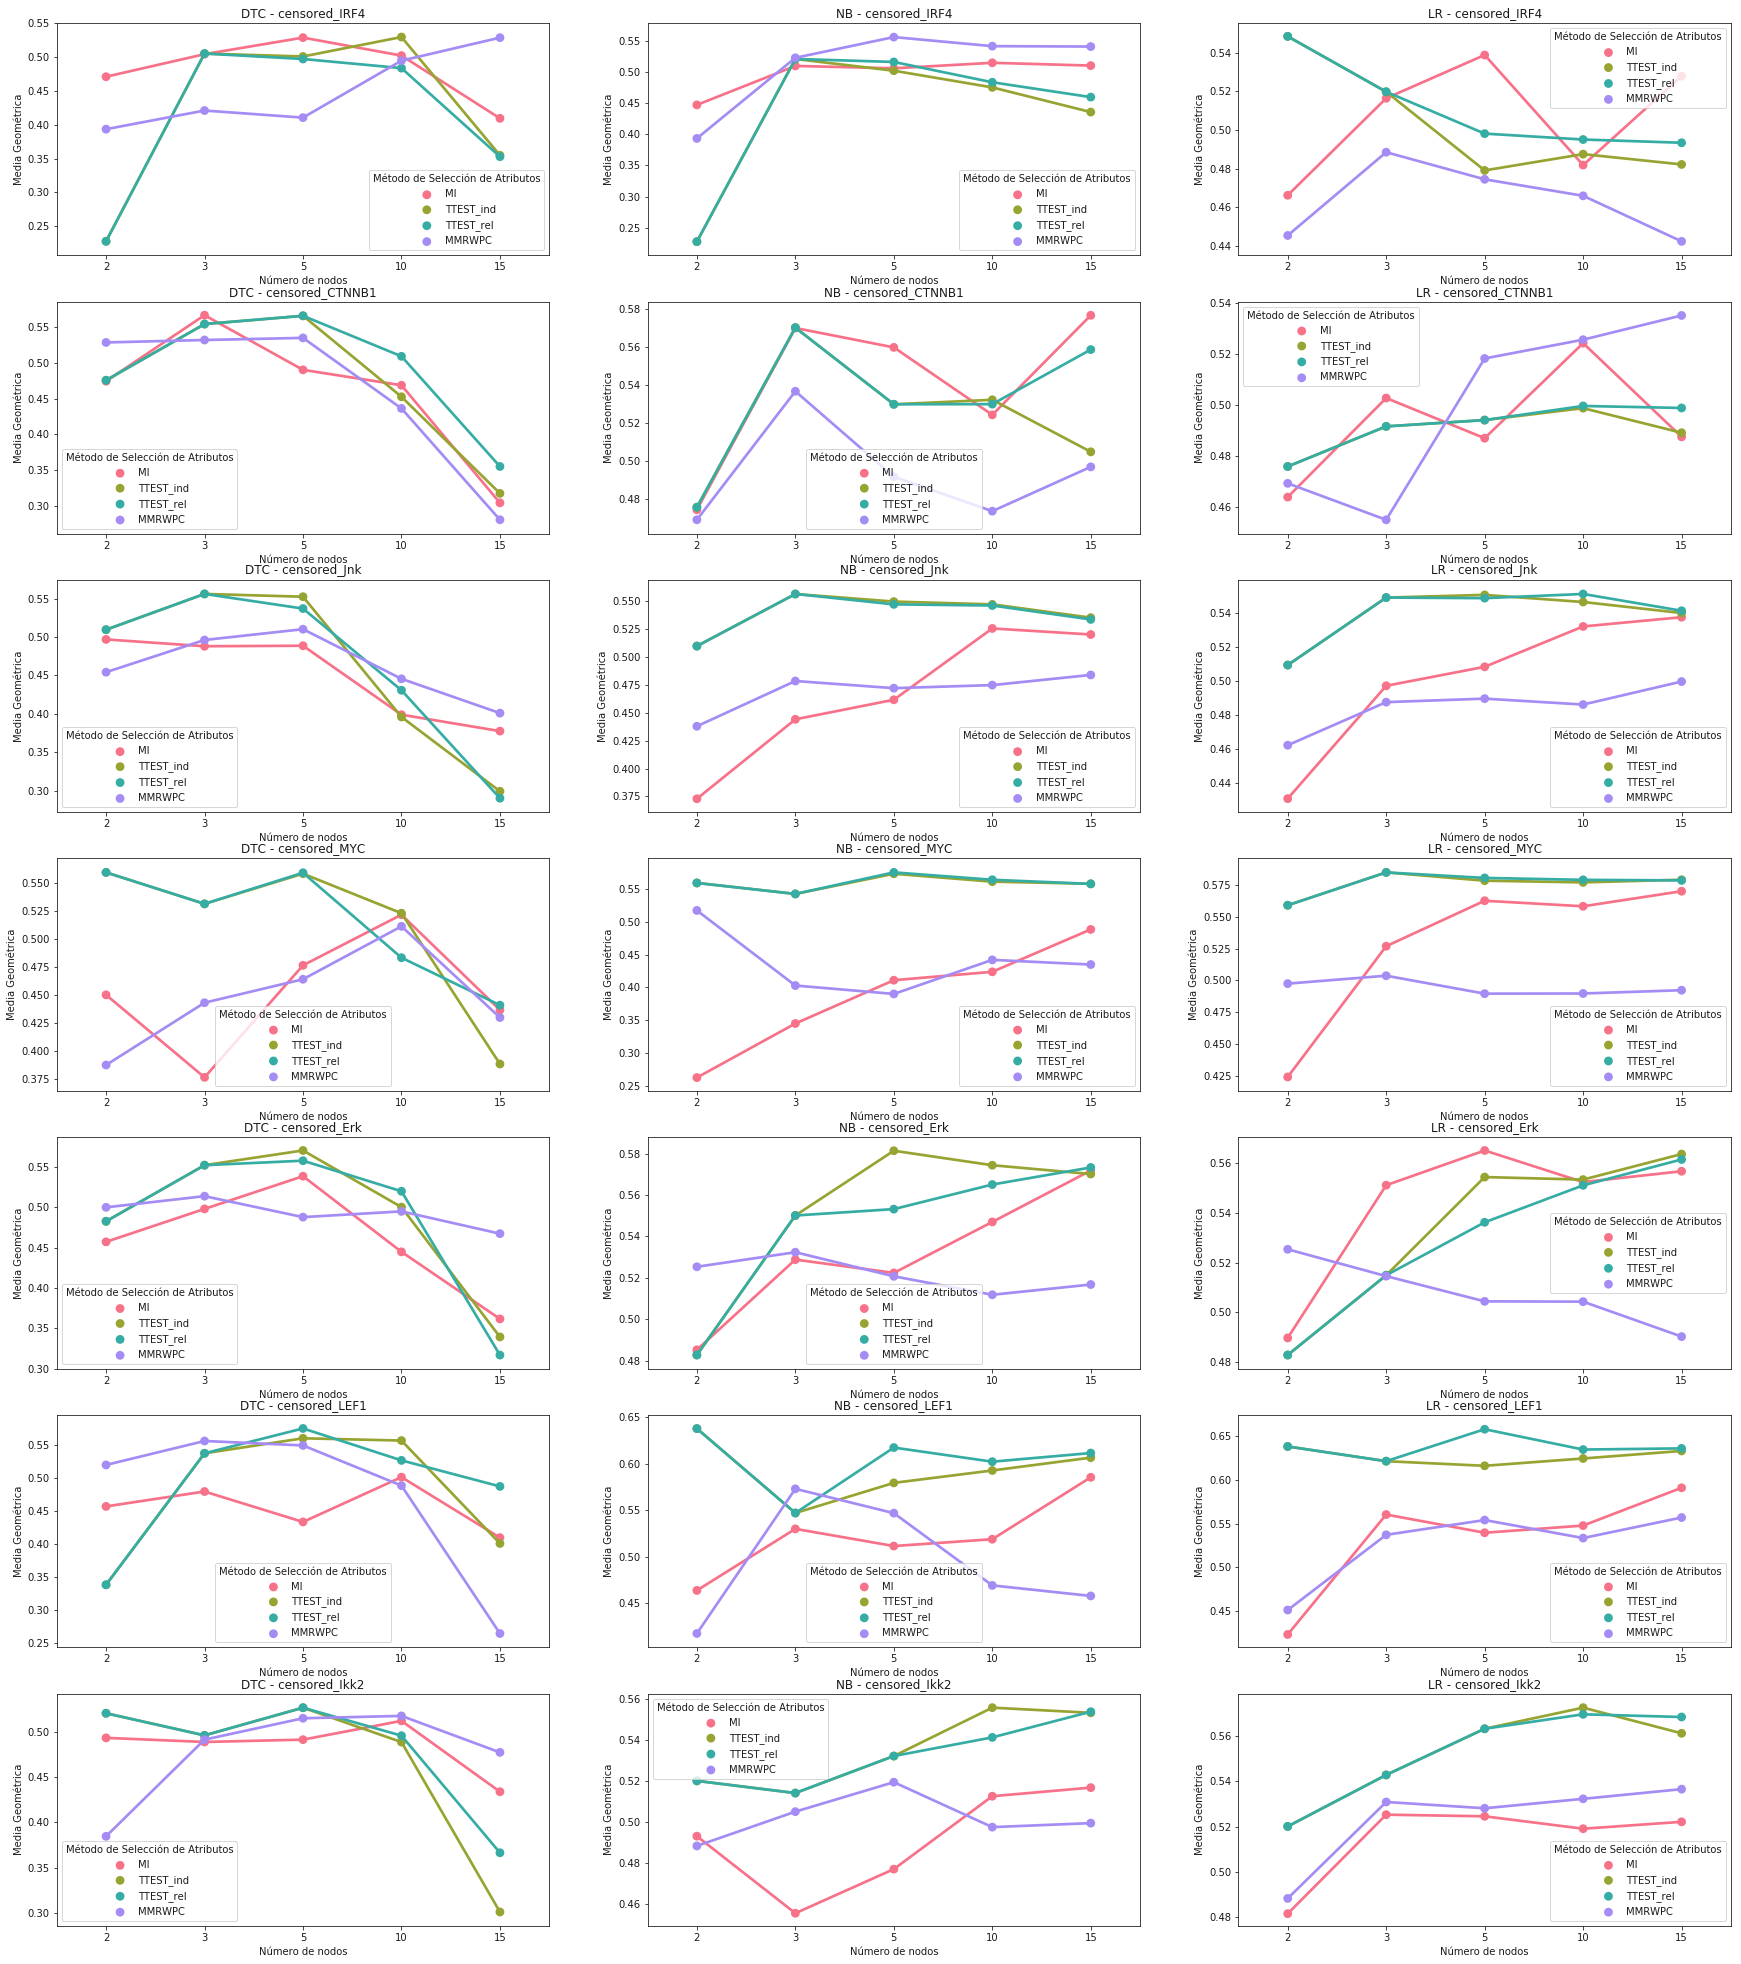

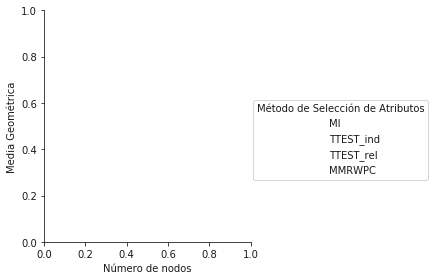

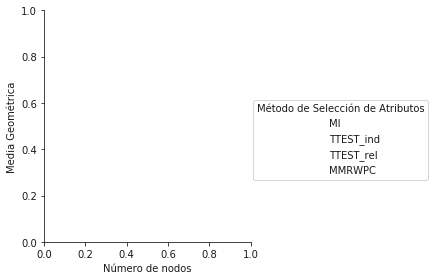

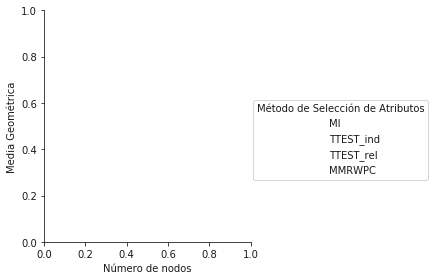

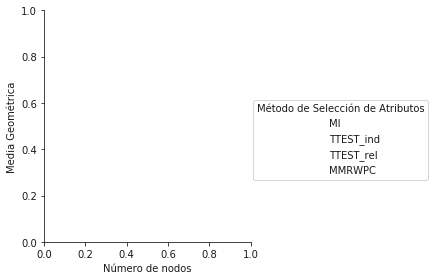

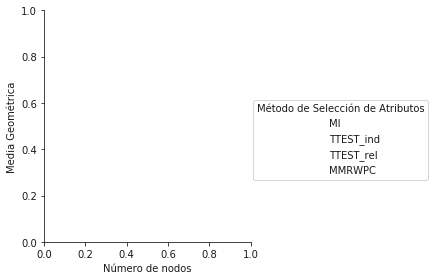

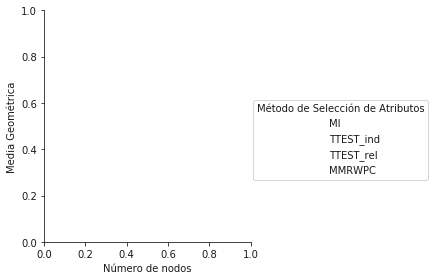

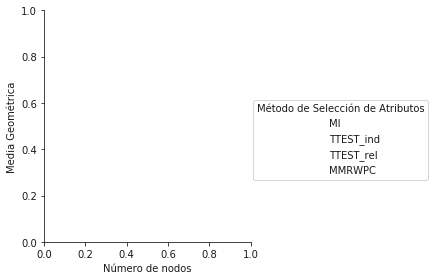

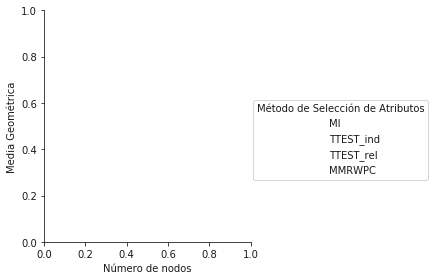

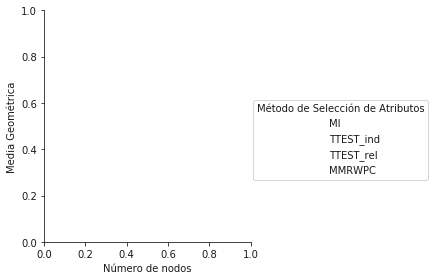

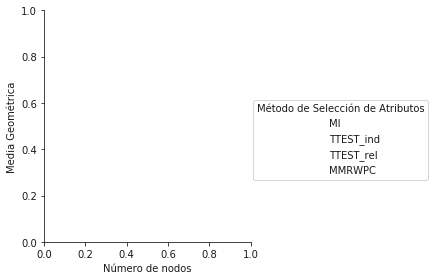

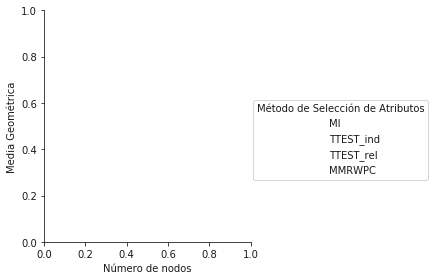

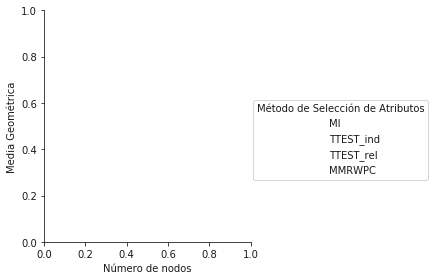

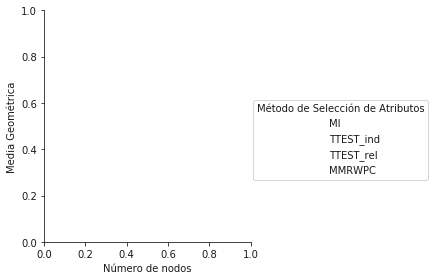

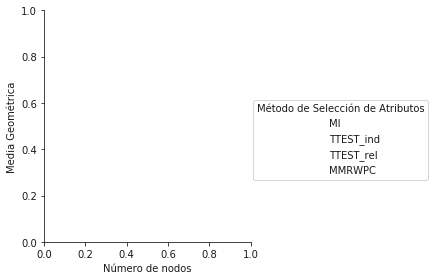

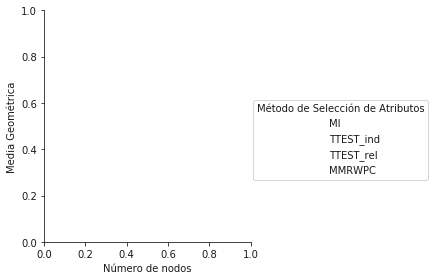

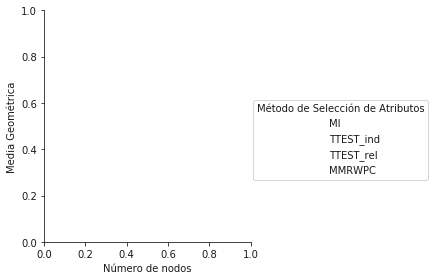

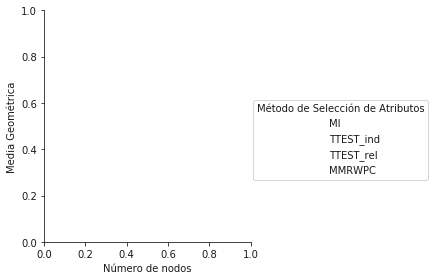

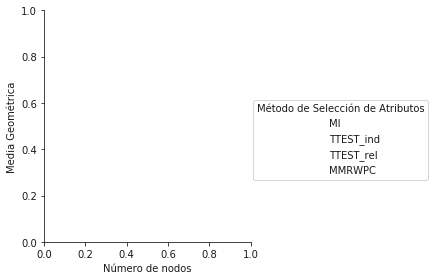

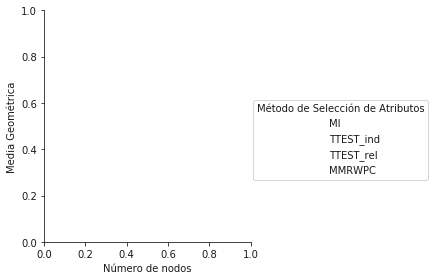

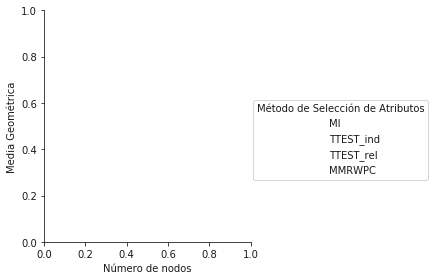

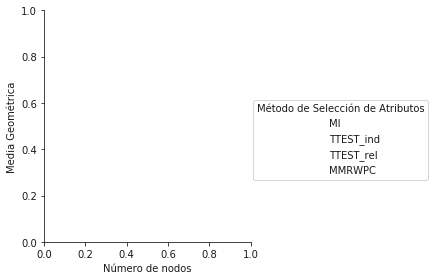

In [75]:
classificator_list = list(set(df["Clasificador"]))
origin_list = list(set(df["Origen"]))

#f, axes = plt.subplots(len(classificator_list), len(origin_list))
f, axes = plt.subplots(len(origin_list),len(classificator_list), figsize=(30,35))
for i in range(0,len(classificator_list)):
    for j in range(0,len(origin_list)):        
        # Draw a pointplot to show pulse as a function of three categorical factors
        sns.set_color_codes("pastel")
        #g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
        g = sns.factorplot(x="Número de nodos",y="Media Geométrica",hue='Método de Selección de Atributos', 
                           data=df.query('Clasificador == "'+classificator_list[i]+'" and Origen=="'+origin_list[j]+'"'), palette="husl", 
                            alpha=0.5, ax=axes[j,i])
        # g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
        # g.map(plt.scatter, "Node name", "Distance", alpha=.5)
        #g.set_yticklabels(np.arange(0,2,0.15))
        #g.set_xticklabels(rotation=90)
        #g.add_legend()
        axes[j,i].title.set_text(classificator_list[i]+" - "+origin_list[j])

In [91]:
aga_df = pd.DataFrame(columns=["Fracción Mínima de Aparación", "Media Geométrica", "Clasificador", "Origen"])
for key in total_results:
    for f_key in total_results[key]:
        if 'AGA' in f_key:
            #print(total_results[key][f_key])
            for fr_key in total_results[key][f_key]:
                for c_key in total_results[key][f_key][fr_key]:
                    aga_df = aga_df.append({
                        "Fracción Mínima de Aparación":float(fr_key), 
                        "Media Geométrica":total_results[key][f_key][fr_key][c_key]['unique'],                        
                        "Clasificador":c_key,
                        "Origen":key
                    }, ignore_index=True)

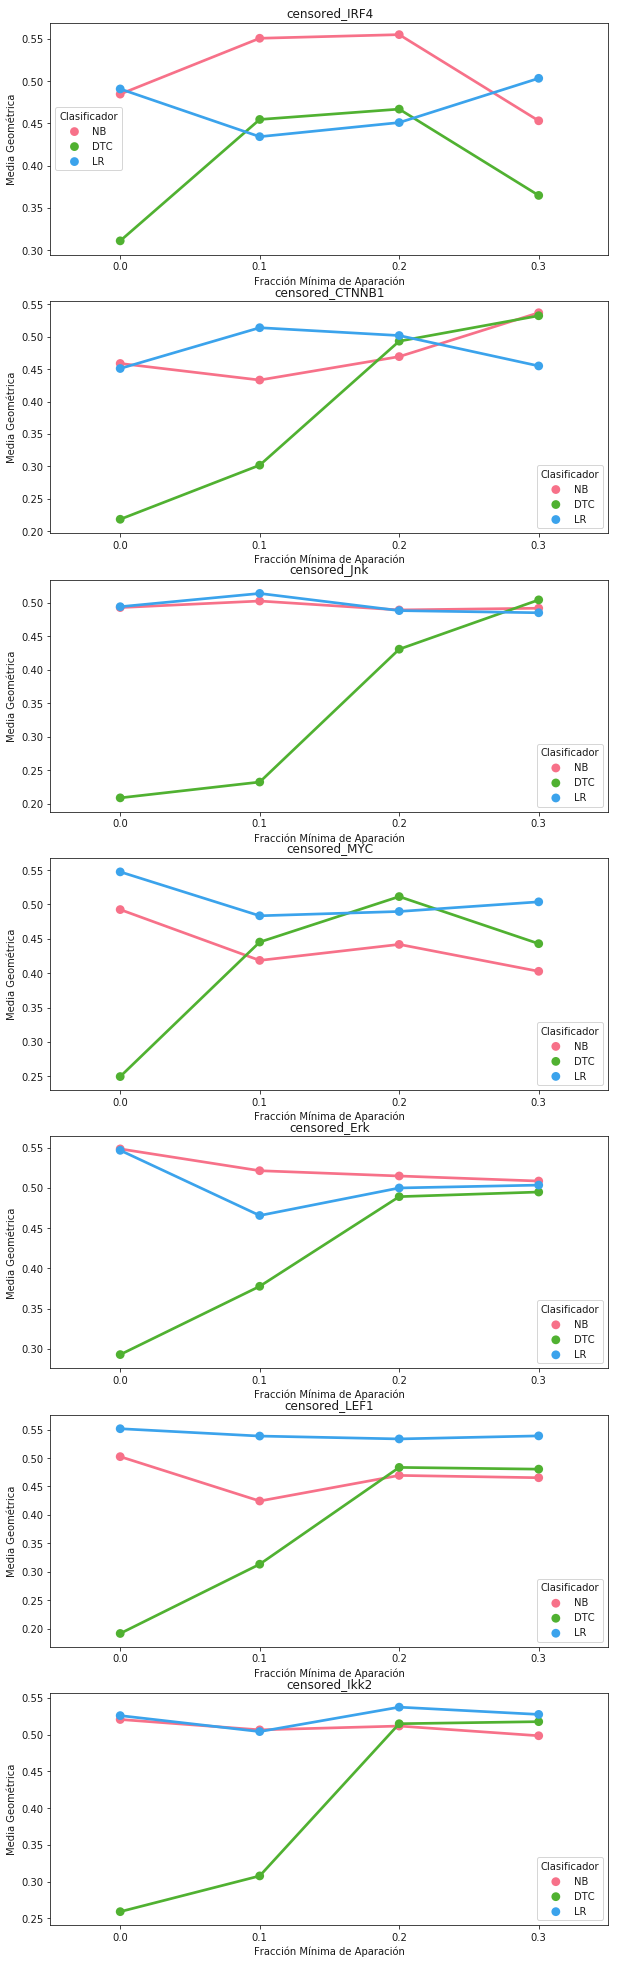

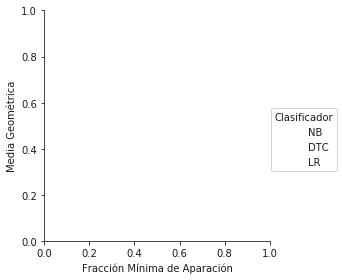

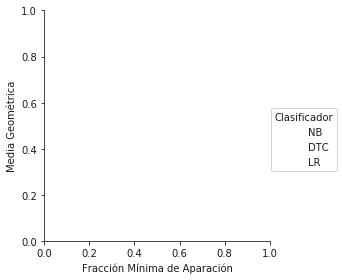

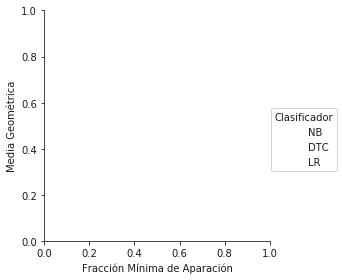

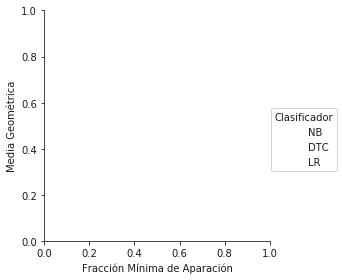

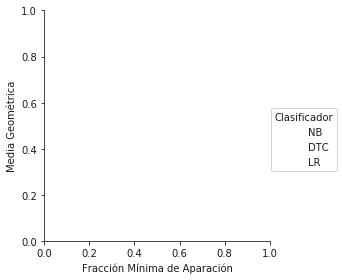

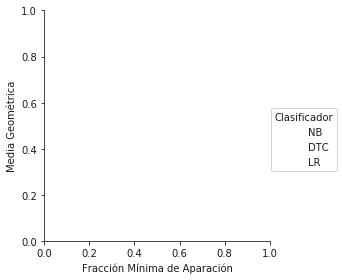

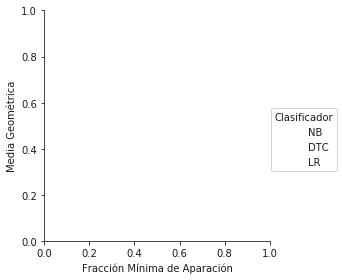

In [97]:
classificator_list = list(set(df["Clasificador"]))
origin_list = list(set(df["Origen"]))

#f, axes = plt.subplots(len(classificator_list), len(origin_list))
f, axes = plt.subplots(len(origin_list),figsize=(10,35))
for j in range(0,len(origin_list)):        
    # Draw a pointplot to show pulse as a function of three categorical factors
    sns.set_color_codes("pastel")
    #g = sns.barplot(x='Node name',y='Distance',hue='Feature Selection Method', data=b_plot_df)
    g = sns.factorplot(x="Fracción Mínima de Aparación",y="Media Geométrica", hue="Clasificador",
                       data=aga_df.query('Origen=="'+origin_list[j]+'"'), palette="husl", 
                        alpha=0.5, ax=axes[j])
    # g = sns.FacetGrid(b_plot_df,hue="Feature Selection Method", size=15, aspect=2)
    # g.map(plt.scatter, "Node name", "Distance", alpha=.5)
    #g.set_yticklabels(np.arange(0,2,0.15))
    #g.set_xticklabels(rotation=90)
    #g.add_legend()
    axes[j].title.set_text(origin_list[j])